In [ ]:
!pip install arch

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np, pandas as pd, time, matplotlib.pyplot as plt, seaborn as sns, os, tqdm, re, sys, cv2, skimage
from arch import arch_model
from scipy.cluster.hierarchy import ward
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import complete
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap

In [ ]:
df = pd.DataFrame() # main dataset
cocoa = pd.read_csv('Cocoa_data.csv')
olovo = pd.read_csv('olovo_quotes.csv', sep=';')
platina = pd.read_csv('platina_quotes.csv', sep=';')
svinec = pd.read_csv('svinec_quotes.csv', sep=';')
lumber = pd.read_csv('Lumber_data.csv')
palladium = pd.read_csv('palladium.csv')
otherFeatures = pd.read_csv('commodity_futures.csv')

In [ ]:

# olovo['high'].iloc[793:5782].astype(int).sort_values(ascending=False)
# palladium[palladium['Symbol']=='Palladium']
# pd.DataFrame(paladium['Symbol'])
palladium['Date'] = palladium['Date'].str.split().str[0]
palladium['Date']

0       2000-01-04
1       2000-01-05
2       2000-01-06
3       2000-01-07
4       2000-01-10
           ...    
4814    2020-12-23
4815    2020-12-24
4816    2020-12-28
4817    2020-12-29
4818    2020-12-30
Name: Date, Length: 4819, dtype: object

In [ ]:
platina['updated'] = pd.to_datetime(platina['updated'])
olovo['updated'] = pd.to_datetime(olovo['updated'])
cocoa['date'] = pd.to_datetime(cocoa['date'])
lumber['date'] = pd.to_datetime(lumber['date'])
svinec['updated'] = pd.to_datetime(svinec['updated'])
palladium['Date'] = pd.to_datetime(palladium['Date'])
otherFeatures['Date'] = pd.to_datetime(otherFeatures['Date'])

In [ ]:
platina.set_index('updated', inplace=True)
olovo.set_index('updated', inplace=True)
svinec.set_index('updated', inplace=True)
cocoa.set_index('date', inplace=True)
lumber.set_index('date', inplace=True)
palladium.set_index('Date', inplace=True)
otherFeatures.set_index('Date', inplace=True)

In [ ]:
otherFeatures

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,69.700,...,1237.50,NaN,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07
2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,69.075,...,1215.00,67.78,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73
2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,68.975,...,1209.25,66.55,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56
2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,70.075,...,1212.00,66.28,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08
2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,70.875,...,1209.25,64.75,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31,2.634,1970.5,81.80,85.56,1445.75,504.00,4.0080,24.972,877.25,178.050,...,2571.31,299.09,22127.0,665.75,24.11,292.90,164.65,104.125,812.75,85.44
2023-08-01,2.560,1940.7,81.37,84.91,1446.75,497.00,3.9085,24.326,911.50,179.500,...,2574.80,302.34,22189.0,652.25,24.39,287.30,164.55,103.675,804.50,86.87
2023-08-02,2.477,1937.4,79.49,83.20,1429.75,488.25,3.8435,23.872,884.50,178.025,...,2486.50,300.43,21379.0,640.00,24.20,277.58,166.95,102.675,787.00,85.08


In [ ]:
# palladiumSubset = palladium[palladium['Symbol']=='Palladium']
# palladiumSubset
cocoa.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2023-09-14', '2023-09-15', '2023-09-18', '2023-09-19',
               '2023-09-20', '2023-09-21', '2023-09-22', '2023-09-25',
               '2023-09-26', '2023-09-27'],
              dtype='datetime64[ns]', name='date', length=5951, freq=None)

In [ ]:
# cocoa_subset = cocoa['close'][180:5156].reset_index(drop=True)
# olovo_subset = olovo['close'][793:5782].sort_values(ascending=False).reset_index(drop=True)
# platina_subset = platina['close'][942:6741].reset_index(drop=True)
# df = pd.DataFrame({'cocoa': cocoa_subset, 'olovo': olovo_subset, 'platina':platina_subset})
# df['cocoa'].fillna(df['cocoa'].mean(), inplace=True)

df = pd.concat([otherFeatures['GOLD'], otherFeatures['SILVER'], platina['close'], palladium['Adj Close'],
                otherFeatures['COPPER'], otherFeatures['ZINC'], olovo['close'], svinec['close'], otherFeatures['NICKEL'],
                otherFeatures['ALUMINIUM'],otherFeatures['BRENT CRUDE'], otherFeatures['WTI CRUDE'], otherFeatures['ULS DIESEL'], otherFeatures['GASOLINE'],
                otherFeatures['WHEAT'], otherFeatures['CORN'], otherFeatures['SOYBEANS'], otherFeatures['COFFEE'], cocoa['close'],
                otherFeatures['COTTON'], lumber['close']], axis=1,
               keys=['gold', 'silver', 'platinum', 'palladium', 'copper', 'zinc', 'tin', 'lead', 'nickel',
                     'aluminum', 'brent', 'wti', 'gasoil', 'gasoline', 'wheat', 'corn', 'soybeans', 'coffee',
                     'cocoa', 'cotton', 'lumber'])
# no 'gasoil' in dataset
df

,gold,silver,platinum,palladium,copper,zinc,tin,lead,nickel,aluminum,...,wti,gasoil,gasoline,wheat,corn,soybeans,coffee,cocoa,cotton,lumber
1990-01-01,NaN,NaN,487.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-02,NaN,NaN,474.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,NaN,NaN,469.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,NaN,NaN,488.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,NaN,NaN,491.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-22,NaN,NaN,932.4,NaN,NaN,NaN,26057.0,2239.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3582.0,NaN,NaN
2023-09-24,NaN,NaN,933.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-25,NaN,NaN,915.8,NaN,NaN,NaN,25691.0,2215.50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN
2023-09-26,NaN,NaN,906.1,NaN,NaN,NaN,25777.0,2219.50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3500.0,NaN,NaN


In [ ]:
date_start = "2000-09-18"
date_end = "2020-07-31"
selectedData = df.loc[date_start:date_end]
selectedData.to_csv('commodity_data.csv', index = True)

In [ ]:
#в использовании майи
frame = pd.read_csv("commodity_data.csv", sep=';')
noDate = frame.copy().drop('date', axis=1)
data = frame.copy()
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')
data.set_index('date', inplace=True)

KeyError: ignored

In [ ]:
# в использовании тани
data = pd.read_csv("commodity_data.csv")
data.set_index('date', inplace=True)

### Log returns

In [ ]:
log_returns = np.log(data/data.shift(1)).dropna()

### Conditional volatility

In [ ]:
# Factor to rescale the log returns
scaling_factor = 100

# Compute conditional volatility using GARCH(1,1) for each commodity
volatility_data = pd.DataFrame(index=log_returns.index)
for commodity in log_returns.columns:
    # Rescale the log returns
    rescaled_returns = log_returns[commodity] * scaling_factor

    model = arch_model(rescaled_returns, vol='Garch', p=1, o=1, dist = 't', mean = 'Zero', q=1)
    res = model.fit(disp='off')

    # Rescale the conditional volatility back to the original scale
    volatility_data[commodity] = res.conditional_volatility / scaling_factor

# Data analysis


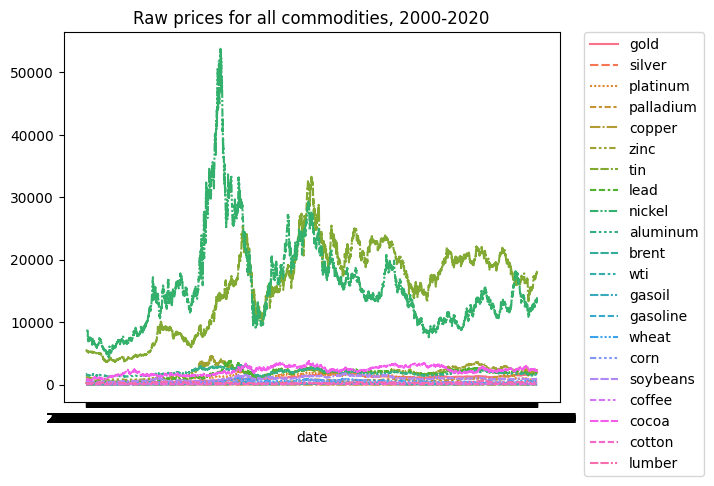

In [ ]:
#figure 1
#figure 1
plt1 = sns.lineplot(data=data)
plt1.set(title='Raw prices for all commodities, 2000-2020')
plt1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### K-means + MDS on CV

In [ ]:
# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(volatility_data)

# Use KMeans clustering to cluster the scaled data
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(scaled_data.T)

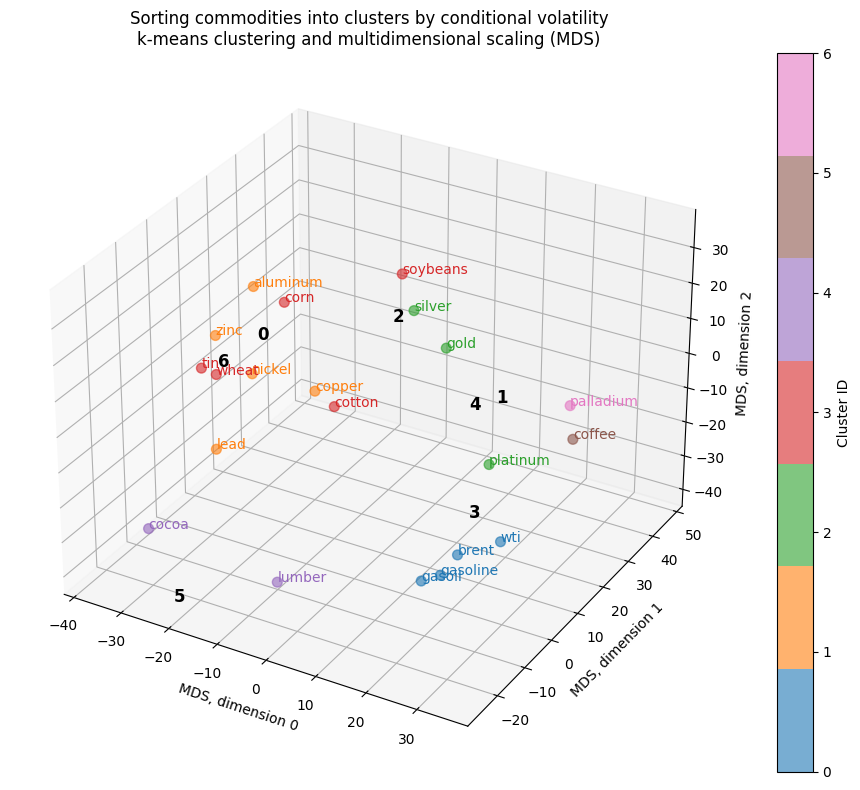

In [ ]:
# Apply MDS to reduce the data to 3 dimensions
mds = MDS(n_components=3, random_state=42)
volatility_mds = mds.fit_transform(scaled_data.T)

# Plot the results in a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

point_labels = log_returns.columns # list of column names
colormap = ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])

scatter = ax.scatter(volatility_mds[:, 0], volatility_mds[:, 1], volatility_mds[:, 2], c=clusters, cmap=colormap, s=50, alpha=0.6)

# Plot centroids
centroids = mds.fit_transform(kmeans.cluster_centers_)
for i, centroid in enumerate(centroids):
    ax.text(centroid[0], centroid[1], centroid[2], str(i), color='black', fontsize=12, fontweight='bold')

# colored labels to data points based on cluster
for i, label in enumerate(point_labels):
    ax.text(volatility_mds[i, 0], volatility_mds[i, 1], volatility_mds[i, 2], label, color=colormap(clusters[i]))

ax.set_xlabel('MDS, dimension 0')
ax.set_ylabel('MDS, dimension 1')
ax.set_zlabel('MDS, dimension 2')
ax.set_title('Sorting commodities into clusters by conditional volatility\nk-means clustering and multidimensional scaling (MDS)')

plt.colorbar(scatter, ticks=np.arange(7), label='Cluster ID')
plt.tight_layout()
plt.show()

### K-means + MDS on LR

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(log_returns.T)

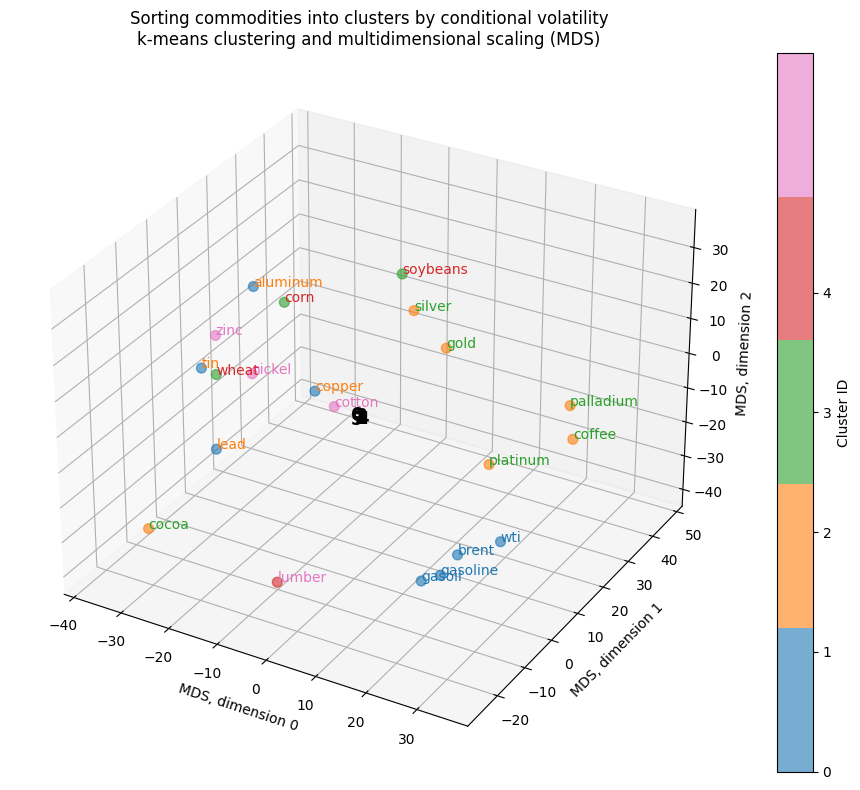

In [ ]:
# Apply MDS to reduce the data to 3 dimensions
mds = MDS(n_components=3, random_state=42)
volatility_mds = mds.fit_transform(scaled_data.T)

# Plot the results in a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

point_labels = log_returns.columns # list of column names
colormap = ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#e377c2'])

scatter = ax.scatter(volatility_mds[:, 0], volatility_mds[:, 1], volatility_mds[:, 2], c=clusters, cmap=colormap, s=50, alpha=0.6)

# Plot centroids
centroids = mds.fit_transform(kmeans.cluster_centers_)
for i, centroid in enumerate(centroids):
    ax.text(centroid[0], centroid[1], centroid[2], str(i), color='black', fontsize=12, fontweight='bold')

# colored labels to data points based on cluster
for i, label in enumerate(point_labels):
    ax.text(volatility_mds[i, 0], volatility_mds[i, 1], volatility_mds[i, 2], label, color=colormap(clusters[i]))

ax.set_xlabel('MDS, dimension 0')
ax.set_ylabel('MDS, dimension 1')
ax.set_zlabel('MDS, dimension 2')
ax.set_title('Sorting commodities into clusters by conditional volatility\nk-means clustering and multidimensional scaling (MDS)')

plt.colorbar(scatter, ticks=np.arange(5), label='Cluster ID')
plt.tight_layout()
plt.show()

# Hierarchical clustering

(21,)


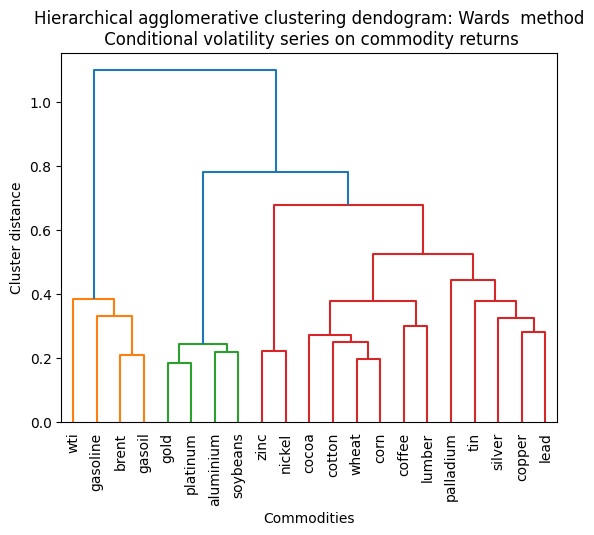

In [ ]:
y = pdist(volatility_data.transpose())
mask = np.isfinite(y)
y = y[mask]
Z = ward(y)
plt.figure()
label_text = ['gold', 'silver', 'platinum', 'palladium', 'copper', 'zinc', 'tin', 'lead', 'nickel', 'aluminium', 'brent', 'wti', 'gasoil', 'gasoline', 'wheat', 'corn', 'soybeans', 'coffee', 'cocoa', 'cotton', 'lumber']
print(np.shape(label_text))
dn = hierarchy.dendrogram(Z, labels=label_text, leaf_rotation=90.)
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
hierarchy.set_link_color_palette(None)  # reset to default after use
plt.title('Hierarchical agglomerative clustering dendogram: Wards  method\n Conditional volatility series on commodity returns')
plt.xlabel('Commodities')
plt.ylabel('Cluster distance')
plt.axhline(linestyle='--', y=60)
plt.show()

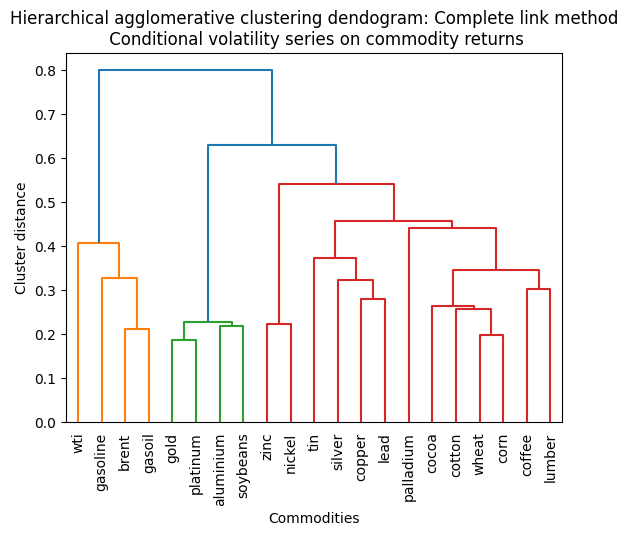

In [ ]:
y = pdist(volatility_data.transpose())
mask = np.isfinite(y)
y = y[mask]
Z = complete(y)
plt.figure()
label_text = ['gold', 'silver', 'platinum', 'palladium', 'copper', 'zinc', 'tin', 'lead', 'nickel', 'aluminium', 'brent', 'wti', 'gasoil', 'gasoline', 'wheat', 'corn', 'soybeans', 'coffee', 'cocoa', 'cotton', 'lumber']
dn = hierarchy.dendrogram(Z, labels=label_text, leaf_rotation=90.)
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
hierarchy.set_link_color_palette(None)  # reset to default after use
plt.title('Hierarchical agglomerative clustering dendogram: Complete link method\n Conditional volatility series on commodity returns')
plt.xlabel('Commodities')
plt.ylabel('Cluster distance')
plt.show()

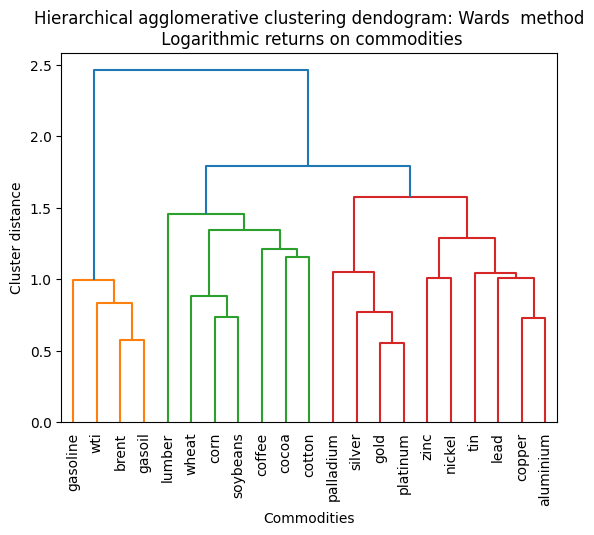

In [ ]:
y = pdist(log_returns.transpose())
mask = np.isfinite(y)
y = y[mask]
Z = ward(y)
plt.figure()
label_text = ['gold', 'silver', 'platinum', 'palladium', 'copper', 'zinc', 'tin', 'lead', 'nickel', 'aluminium', 'brent', 'wti', 'gasoil', 'gasoline', 'wheat', 'corn', 'soybeans', 'coffee', 'cocoa', 'cotton', 'lumber']
dn = hierarchy.dendrogram(Z, labels=label_text, leaf_rotation=90.)
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
hierarchy.set_link_color_palette(None)  # reset to default after use
plt.title('Hierarchical agglomerative clustering dendogram: Wards  method\n Logarithmic returns on commodities')
plt.xlabel('Commodities')
plt.ylabel('Cluster distance')
plt.show()

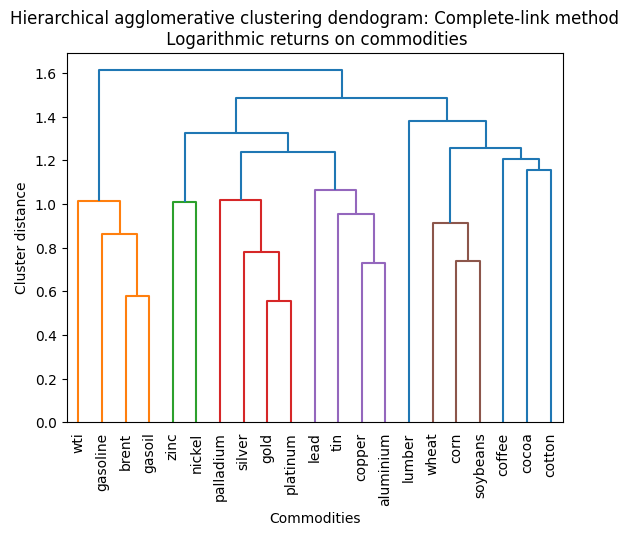

In [ ]:
y = pdist(log_returns.transpose())
mask = np.isfinite(y)
y = y[mask]
Z = complete(y)
plt.figure()
label_text = ['gold', 'silver', 'platinum', 'palladium', 'copper', 'zinc', 'tin', 'lead', 'nickel', 'aluminium', 'brent', 'wti', 'gasoil', 'gasoline', 'wheat', 'corn', 'soybeans', 'coffee', 'cocoa', 'cotton', 'lumber']
dn = hierarchy.dendrogram(Z, labels=label_text, leaf_rotation=90.)
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
hierarchy.set_link_color_palette(None)  # reset to default after use
plt.title('Hierarchical agglomerative clustering dendogram: Complete-link method\n Logarithmic returns on commodities')
plt.xlabel('Commodities')
plt.ylabel('Cluster distance')
plt.show()

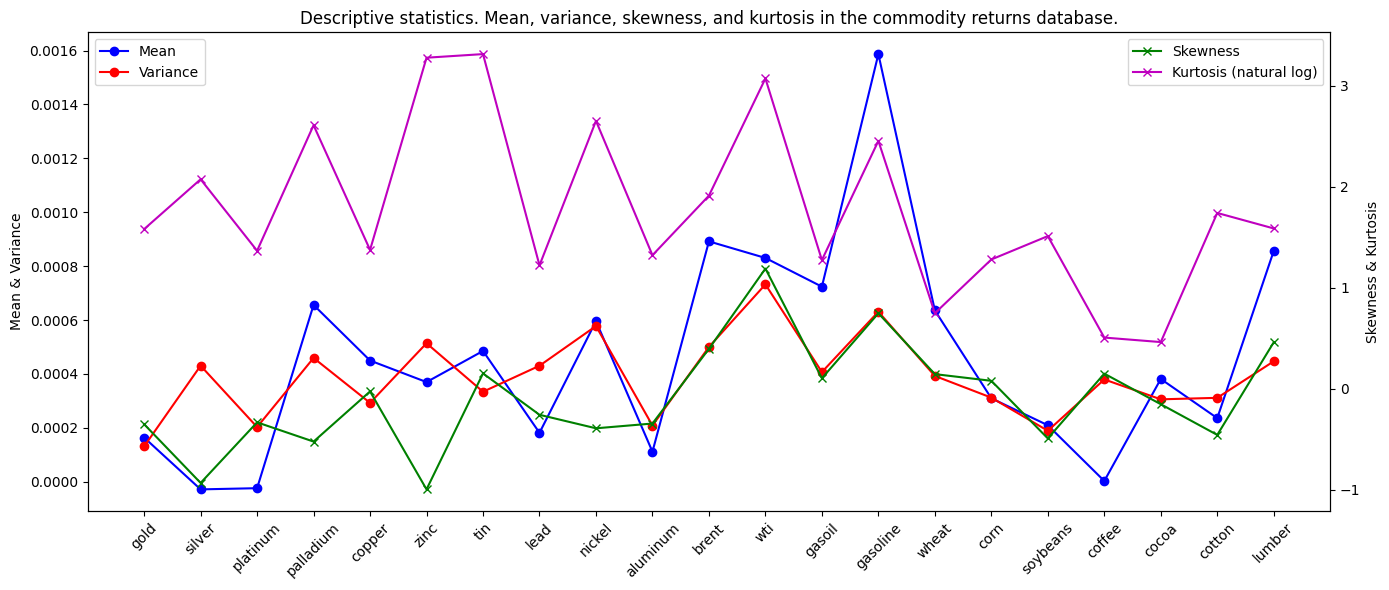

In [ ]:
df = pd.read_csv("commodity_data.csv")
df.set_index('date', inplace=True)

# Calculate daily log returns
log_returns = np.log(df / df.shift(1))
log_returns = log_returns.dropna()

# Calculate descriptive statistics
means = log_returns.mean()
variances = log_returns.var()
skewness = log_returns.skew()
kurtosis_log = np.log(log_returns.kurtosis())

# Plot the results
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot mean and variance on the left y-axis
ax1.plot(means, label='Mean', color='b', marker='o')
ax1.plot(variances, label='Variance', color='r', marker='o')
ax1.set_ylabel('Mean & Variance', color='black')
ax1.set_xticks(range(len(log_returns.columns)))
ax1.set_xticklabels(log_returns.columns, rotation=45)
ax1.legend(loc='upper left')

# Create a second y-axis to plot skewness and kurtosis
ax2 = ax1.twinx()
ax2.plot(skewness, label='Skewness', color='g', marker='x')
ax2.plot(kurtosis_log, label='Kurtosis (natural log)', color='m', marker='x')
ax2.set_ylabel('Skewness & Kurtosis', color='black')
ax2.legend(loc='upper right')

# Set the title and show the plot
plt.title('Descriptive statistics. Mean, variance, skewness, and kurtosis in the commodity returns database.')
plt.tight_layout()
plt.show()

### Temporal analysis on CVcxf

### k-means and MDS

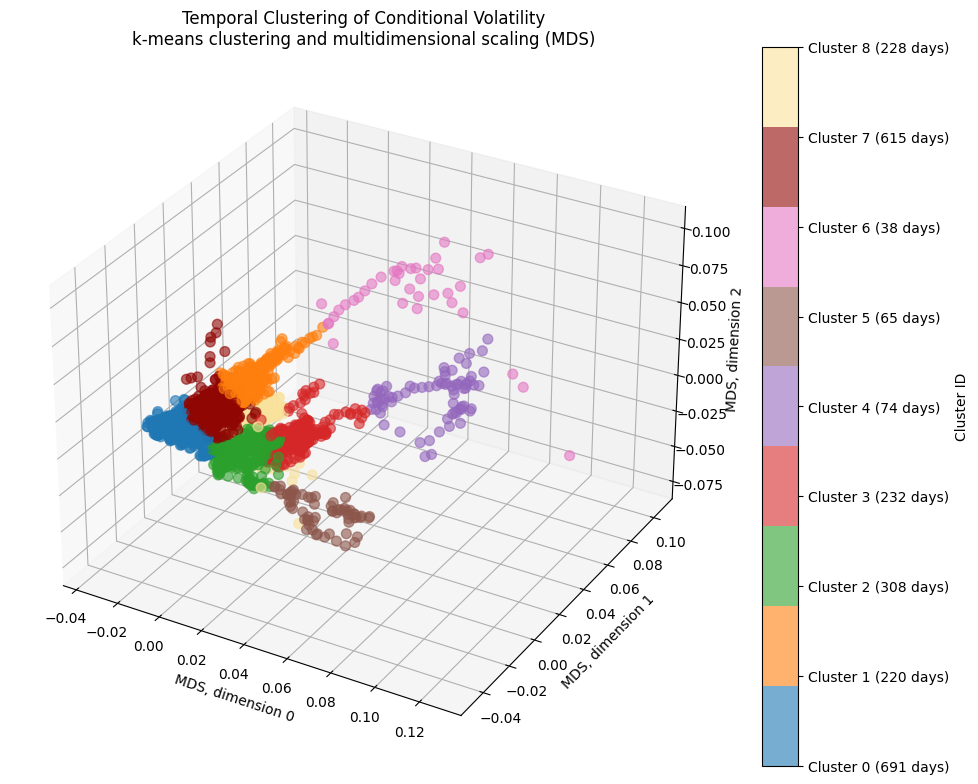

In [ ]:
kmeans = KMeans(n_clusters=9, random_state=42)
clusters = kmeans.fit_predict(volatility_data)

# Apply MDS to reduce the data to 3 dimensions for visualization
mds = MDS(n_components=3, random_state=42)
temp_volatility_mds = mds.fit_transform(volatility_data)
cluster_counts = pd.Series(clusters).value_counts().sort_index()

# Create a custom colormap from the list of colors
custom_colors = ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#900603', '#FAE29C'])

# Plot the results in a 3D scatter plot with colored labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each time period with color-coded clusters
scatter = ax.scatter(temp_volatility_mds[:, 2], temp_volatility_mds[:, 1], temp_volatility_mds[:, 0], c=clusters, cmap=custom_colors, s=50, alpha=0.6)

ax.set_xlabel('MDS, dimension 0')
ax.set_ylabel('MDS, dimension 1')
ax.set_zlabel('MDS, dimension 2')
ax.set_title('Temporal Clustering of Conditional Volatility\nk-means clustering and multidimensional scaling (MDS)')

# Create a custom colorbar with cluster labels
unique_clusters = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
cluster_labels = [f'Cluster {cluster} ({count} days)' for cluster, count in zip(unique_clusters, cluster_counts)]

# Create a custom colorbar with cluster labels
cbar = plt.colorbar(scatter, ticks=unique_clusters, label='Cluster ID')
cbar.set_ticklabels(cluster_labels)

plt.tight_layout()
plt.show()

### t-SNE

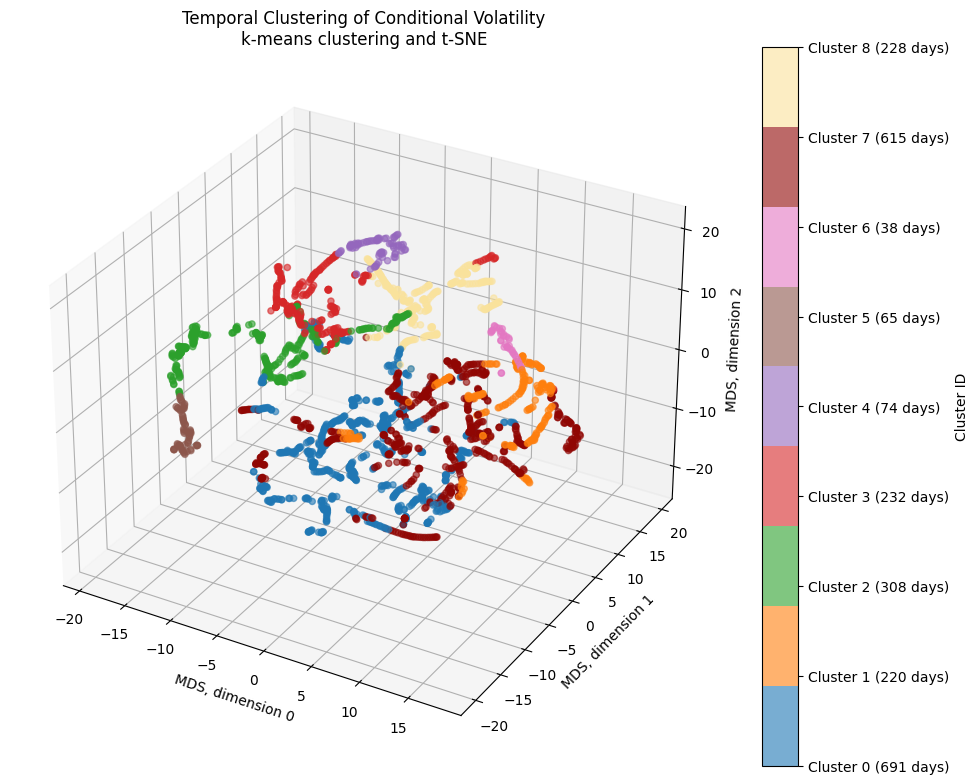

In [ ]:
tsne = TSNE(n_components=3)
temp_volatility_tsne = tsne.fit_transform(volatility_data)

custom_colors = ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#900603', '#FAE29C'])

# Plot the results in a 3D scatter plot with colored labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each time period with color-coded clusters
scatter = ax.scatter(temp_volatility_tsne[:, 1], temp_volatility_tsne[:, 2], temp_volatility_tsne[:, 0], cmap = custom_colors, c=clusters, s=20, alpha=0.6)

ax.set_xlabel('MDS, dimension 0')
ax.set_ylabel('MDS, dimension 1')
ax.set_zlabel('MDS, dimension 2')
ax.set_title('Temporal Clustering of Conditional Volatility\nk-means clustering and t-SNE')

# Create a custom colorbar with cluster labels
cluster_labels = [f'Cluster {cluster} ({count} days)' for cluster, count in zip(unique_clusters, cluster_counts)]

# Create a custom colorbar with cluster labels
cbar = plt.colorbar(scatter, ticks=unique_clusters, label='Cluster ID')
cbar.set_ticklabels(cluster_labels)

plt.tight_layout()
plt.show()

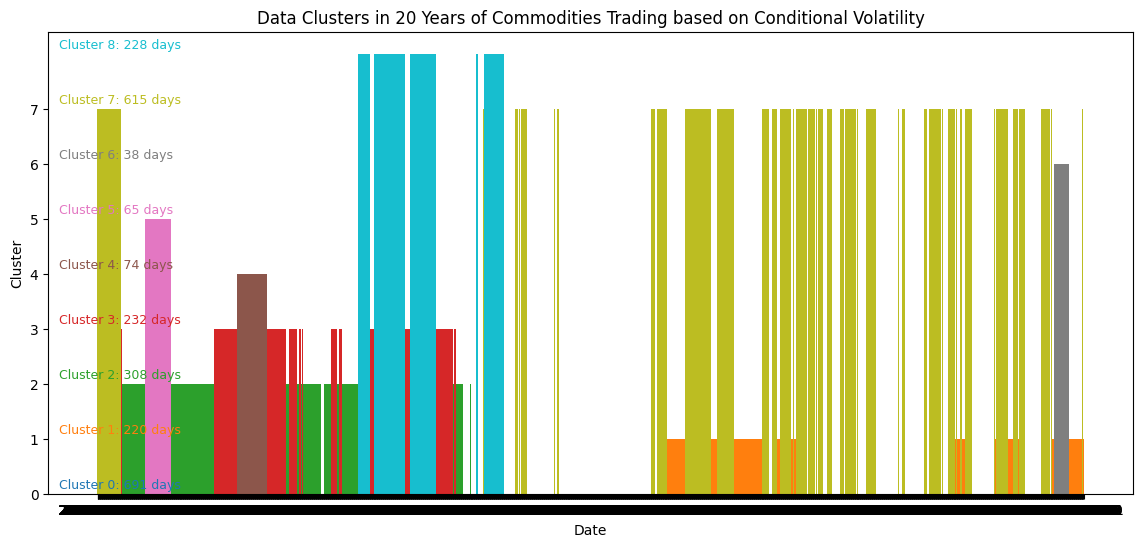

In [ ]:
#FIGURE 16

# Plot the clusters against dates using a bar chart
plt.figure(figsize=(14, 6))
plt.bar(volatility_data.index, clusters, color=plt.cm.tab10(clusters / 8.0), width=1.0)
plt.xlabel('Date')
plt.ylabel('Cluster')
plt.yticks(np.arange(8), labels=np.arange(8))
plt.title('Data Clusters in 20 Years of Commodities Trading based on Conditional Volatility')

# Annotate the chart with the number of days in each cluster
for cluster_id, count in cluster_counts.items():
    plt.annotate(f'Cluster {cluster_id}: {count} days', xy=(0.01, cluster_id + 0.1), xycoords=('axes fraction', 'data'),
                 fontsize=9, color=plt.cm.tab10(cluster_id / 8.0))

#plt.tight_layout()
plt.show()

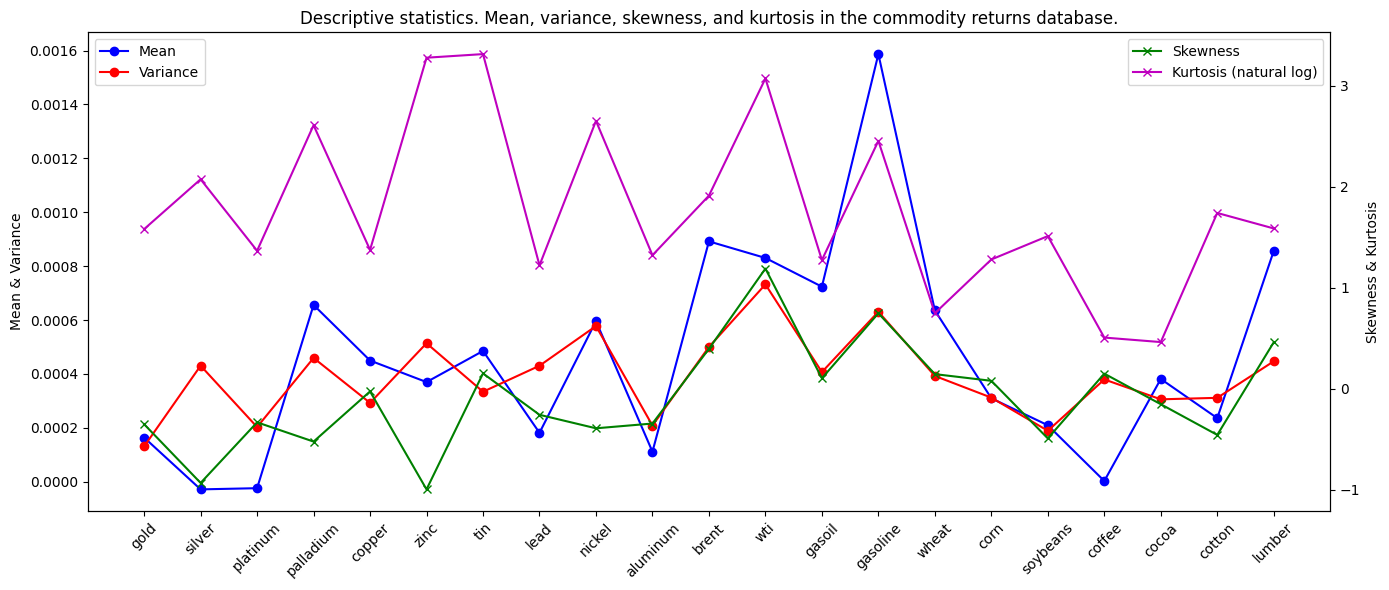

In [ ]:
# Calculate daily log returns
log_returns1 = np.log(df / df.shift(1))
log_returns1 = log_returns1.dropna()

# Calculate descriptive statistics
means = log_returns1.mean()
variances = log_returns1.var()
skewness = log_returns1.skew()
kurtosis_log = np.log(log_returns1.kurtosis())

# Plot the results
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot mean and variance on the left y-axis
ax1.plot(means, label='Mean', color='b', marker='o')
ax1.plot(variances, label='Variance', color='r', marker='o')
ax1.set_ylabel('Mean & Variance', color='black')
ax1.set_xticks(range(len(log_returns1.columns)))
ax1.set_xticklabels(log_returns1.columns, rotation=45)
ax1.legend(loc='upper left')

# Create a second y-axis to plot skewness and kurtosis
ax2 = ax1.twinx()
ax2.plot(skewness, label='Skewness', color='g', marker='x')
ax2.plot(kurtosis_log, label='Kurtosis (natural log)', color='m', marker='x')
ax2.set_ylabel('Skewness & Kurtosis', color='black')
ax2.legend(loc='upper right')

# Set the title and show the plot
plt.title('Descriptive statistics. Mean, variance, skewness, and kurtosis in the commodity returns database.')
plt.tight_layout()
plt.show()

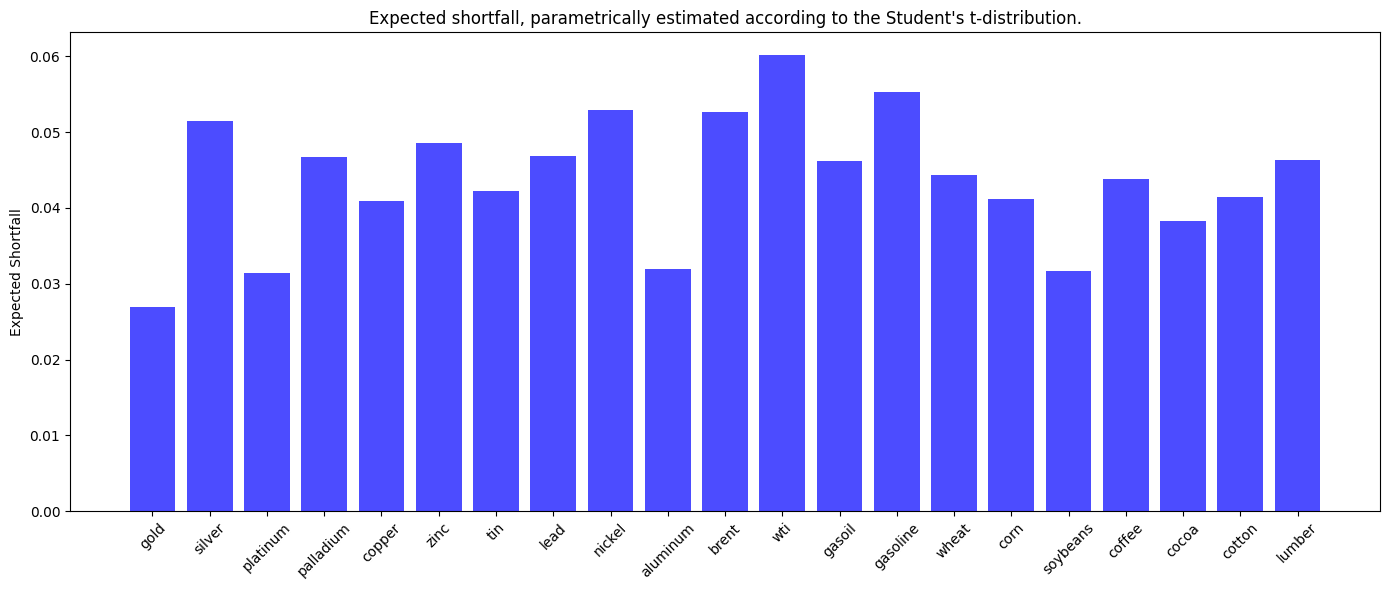

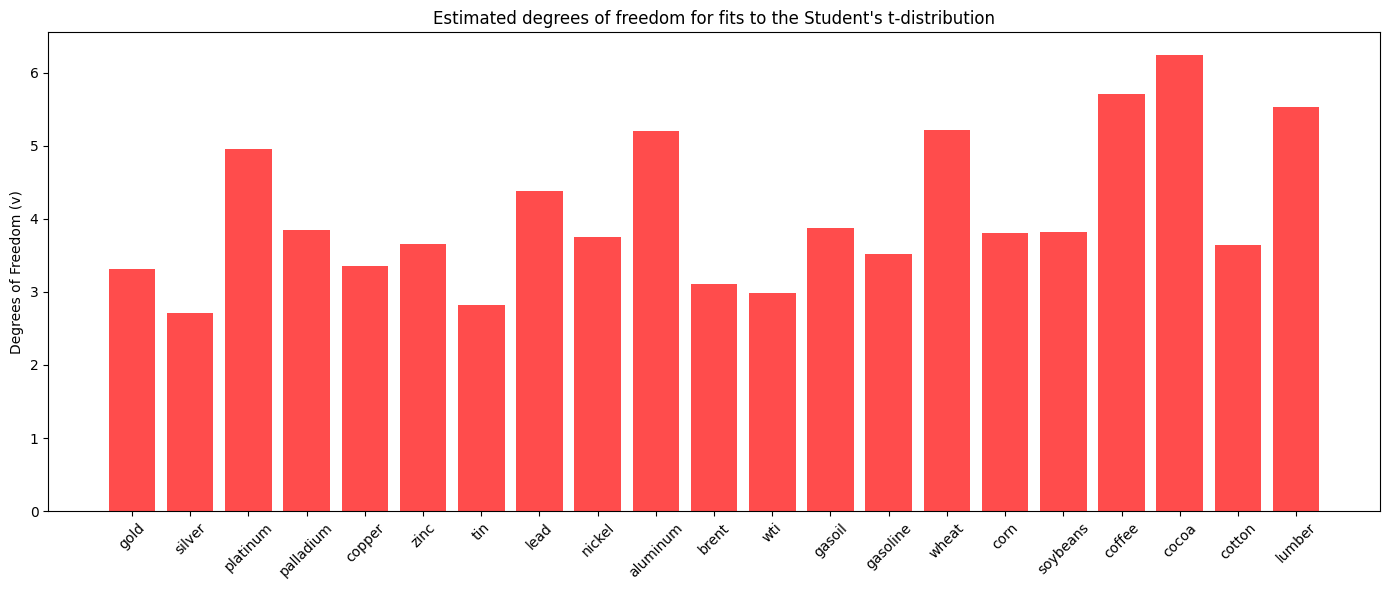

In [ ]:
from scipy.stats import t

# Calculate expected shortfall and degrees of freedom
alpha = 0.05  # 5% significance level
expected_shortfalls = []
degrees_of_freedom = []

for commodity in log_returns.columns:
    returns = log_returns[commodity]

    # Fit the Student's t-distribution
    params = t.fit(returns)
    df, loc, scale = params

    # Calculate the expected shortfall
    quantile = t.ppf(alpha, df, loc, scale)
    es = t.expect(lambda x: x, args=(df,), loc=loc, scale=scale, lb=-np.inf, ub=quantile) / alpha

    expected_shortfalls.append(abs(es))
    degrees_of_freedom.append(df)



# Plot the expected shortfall
plt.figure(figsize=(14, 6))
plt.bar(log_returns.columns, expected_shortfalls, color='b', alpha=0.7)
plt.ylabel('Expected Shortfall')
plt.title("Expected shortfall, parametrically estimated according to the Student's t-distribution.")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the degrees of freedom
plt.figure(figsize=(14, 6))
plt.bar(log_returns.columns, degrees_of_freedom, color='r', alpha=0.7)
plt.ylabel('Degrees of Freedom (v)')
plt.title("Estimated degrees of freedom for fits to the Student's t-distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

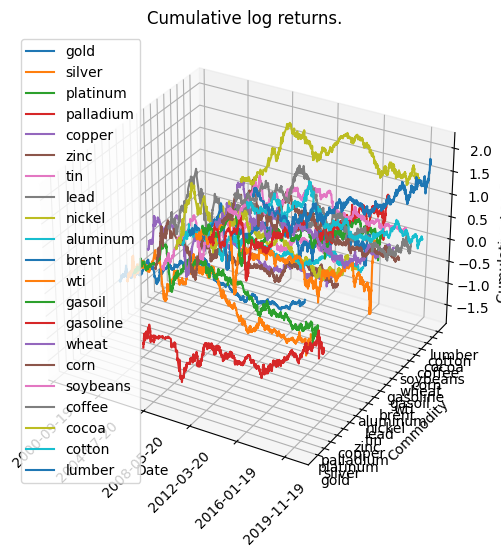

In [ ]:
# FIGURE 2

# Read the CSV file
df = pd.read_csv("commodity_data.csv", parse_dates=["date"])
df.rename(columns={"date": "Date"}, inplace=True)
df.set_index('Date', inplace=True)

# Calculate daily log returns
log_returns = np.log(df / df.shift(1))

# Calculate cumulative log returns
cumulative_log_returns = log_returns.cumsum()

# Drop NaN values
cumulative_log_returns = cumulative_log_returns.dropna()

# 3D Line Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Convert Timestamps to ordinal numbers
x = np.array([date.toordinal() for date in cumulative_log_returns.index])

# Map commodity names to integers and plot each commodity's cumulative log returns as a line
commodity_mapping = {commodity: i for i, commodity in enumerate(cumulative_log_returns.columns)}
for commodity, i in commodity_mapping.items():
    y = np.full(cumulative_log_returns.shape[0], i)  # Create an array filled with the same value
    z = cumulative_log_returns[commodity].values
    ax.plot(x, y, z, label=commodity)

ax.set_xlabel('Date')
ax.set_ylabel('Commodity')
ax.set_zlabel('Cumulative Log Return')

# Set specific date ticks on the X-axis
desired_dates = ["2000-09-19", "2004-07-20", "2008-05-20", "2012-03-20", "2016-01-19", "2019-11-19"]
date_ticks = [pd.Timestamp(date).toordinal() for date in desired_dates]
ax.set_xticks(date_ticks)
ax.set_xticklabels(desired_dates, rotation=45)  # Rotate for better visibility

# Set the tick labels on the Y-axis to the original commodity names
ax.set_yticks(list(commodity_mapping.values()))
ax.set_yticklabels(list(commodity_mapping.keys()))

ax.legend()  # Add a legend to differentiate commodities

#plt.tight_layout()
plt.title("Cumulative log returns.")
plt.show()


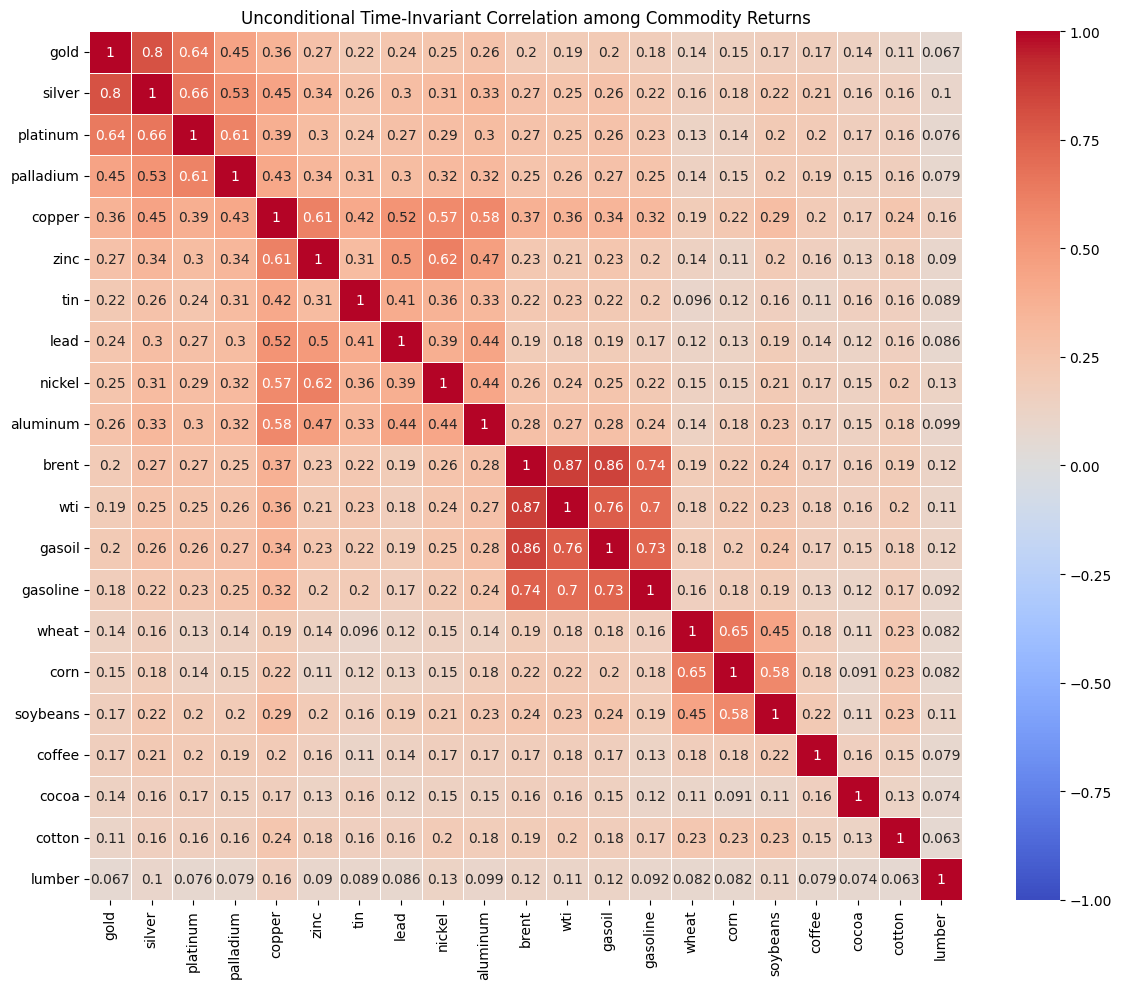

In [ ]:
#FIGURE 4

# Calculate daily log returns
log_returns = np.log(df / df.shift(1))
log_returns = log_returns.dropna()

# Compute the correlation matrix
correlation_matrix = log_returns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Unconditional Time-Invariant Correlation among Commodity Returns")
plt.tight_layout()
plt.show()


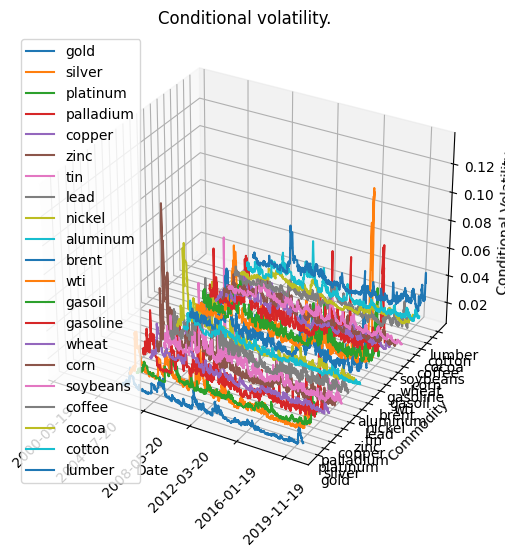

In [ ]:
from arch import arch_model

# Calculate daily log returns
log_returns = np.log(df / df.shift(1))
log_returns = log_returns.dropna()

# Compute conditional volatility using GARCH(1,1) for each commodity
volatility_data = pd.DataFrame(index=log_returns.index)
for commodity in log_returns.columns:
    model = arch_model(log_returns[commodity], vol='Garch', p=1, q=1)
    res = model.fit(disp='off')
    volatility_data[commodity] = res.conditional_volatility

# 3D Line Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Convert Timestamps to ordinal numbers
x = np.array([date.toordinal() for date in volatility_data.index])

# Map commodity names to integers and plot each commodity's conditional volatility as a line
commodity_mapping = {commodity: i for i, commodity in enumerate(volatility_data.columns)}
for commodity, i in commodity_mapping.items():
    y = np.full(volatility_data.shape[0], i)  # Create an array filled with the same value
    z = volatility_data[commodity].values
    ax.plot(x, y, z, label=commodity)

ax.set_xlabel('Date')
ax.set_ylabel('Commodity')
ax.set_zlabel('Conditional Volatility')

# Set specific date ticks on the X-axis
desired_dates = ["2000-09-19", "2004-07-20", "2008-05-20", "2012-03-20", "2016-01-19", "2019-11-19"]
date_ticks = [pd.Timestamp(date).toordinal() for date in desired_dates]
ax.set_xticks(date_ticks)
ax.set_xticklabels(desired_dates, rotation=45)  # Rotate for better visibility

# Set the tick labels on the Y-axis to the original commodity names
ax.set_yticks(list(commodity_mapping.values()))
ax.set_yticklabels(list(commodity_mapping.keys()))

ax.legend()  # Add a legend to differentiate commodities

#plt.tight_layout()
plt.title("Conditional volatility.")
plt.show()



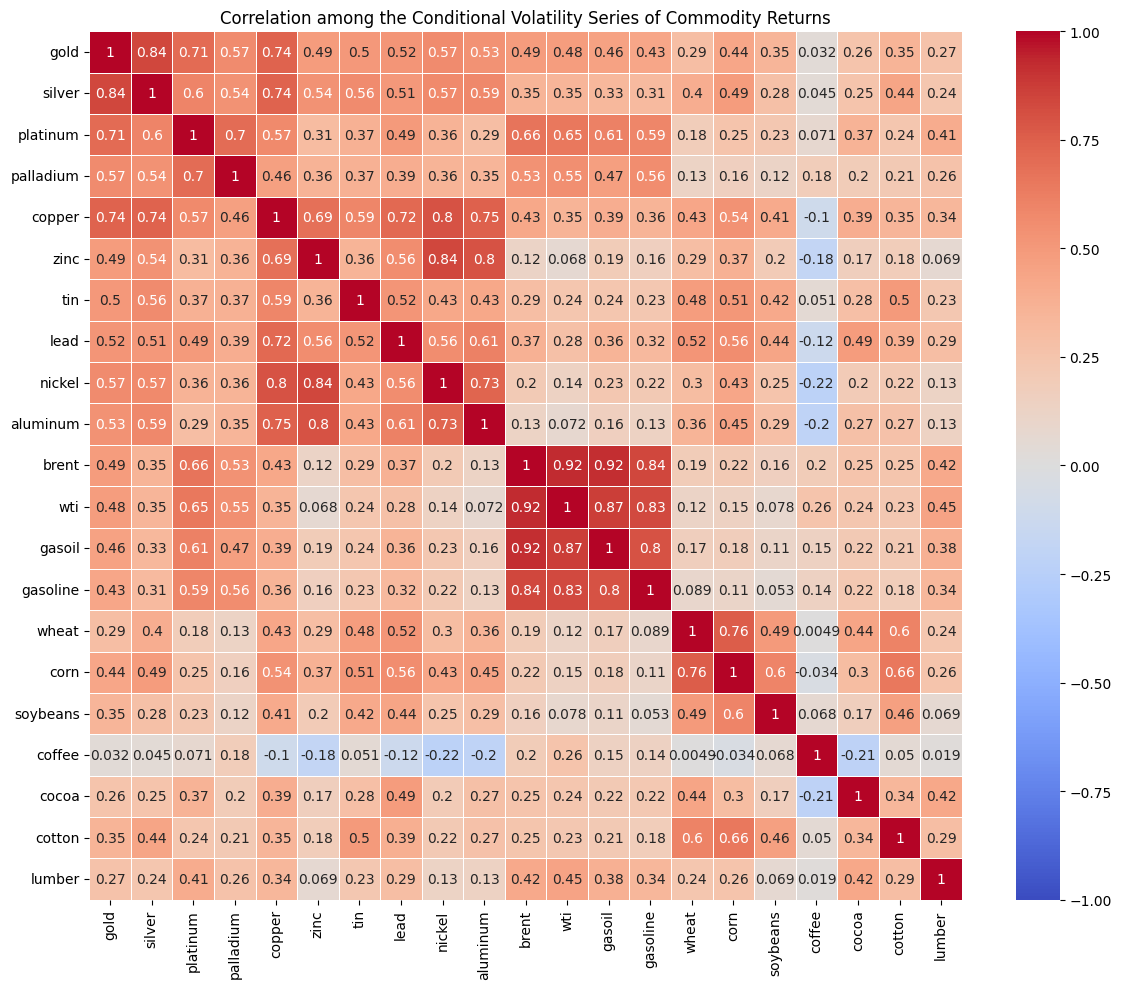

In [ ]:
# Calculate daily log returns
log_returns = np.log(df / df.shift(1))
log_returns = log_returns.dropna()

# Compute conditional volatility using GARCH(1,1) for each commodity
volatility_data = pd.DataFrame(index=log_returns.index)
for commodity in log_returns.columns:
    model = arch_model(log_returns[commodity], vol='Garch', p=1, q=1)
    res = model.fit(disp='off')
    volatility_data[commodity] = res.conditional_volatility

# Compute the correlation matrix for the conditional volatility series
correlation_matrix_volatility = volatility_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_volatility, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation among the Conditional Volatility Series of Commodity Returns")
plt.tight_layout()
plt.show()


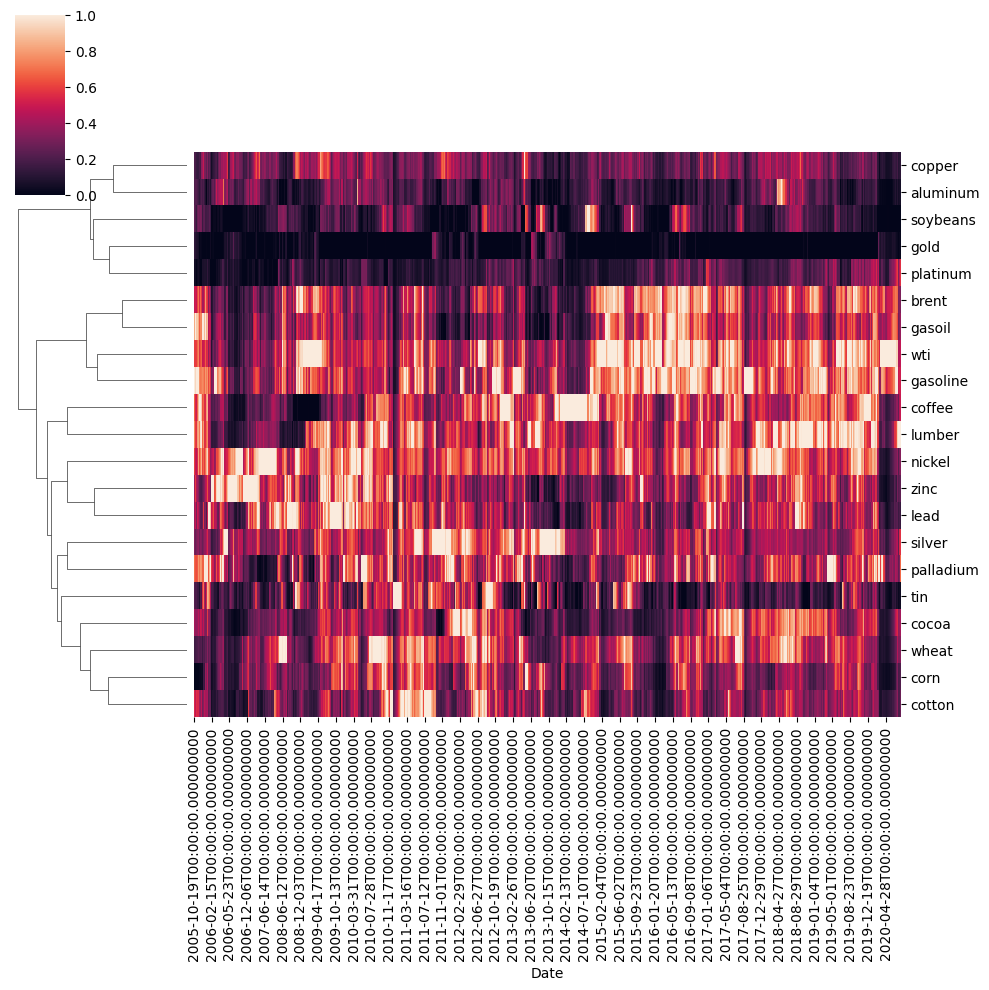

In [ ]:
cg = sns.clustermap(volatility_data.transpose(), standard_scale=1, col_cluster=False)

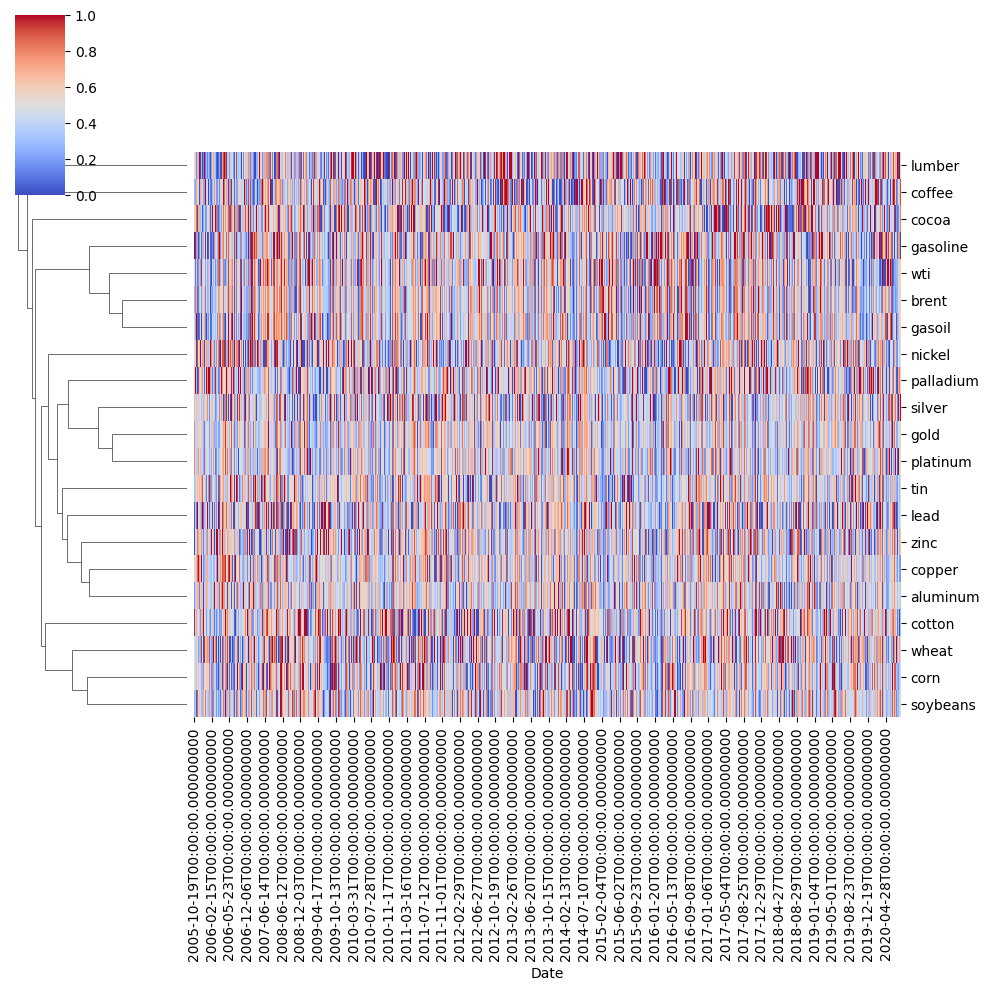

In [ ]:
cg = sns.clustermap(log_returns.transpose(), standard_scale=1, col_cluster=False, cmap='coolwarm')

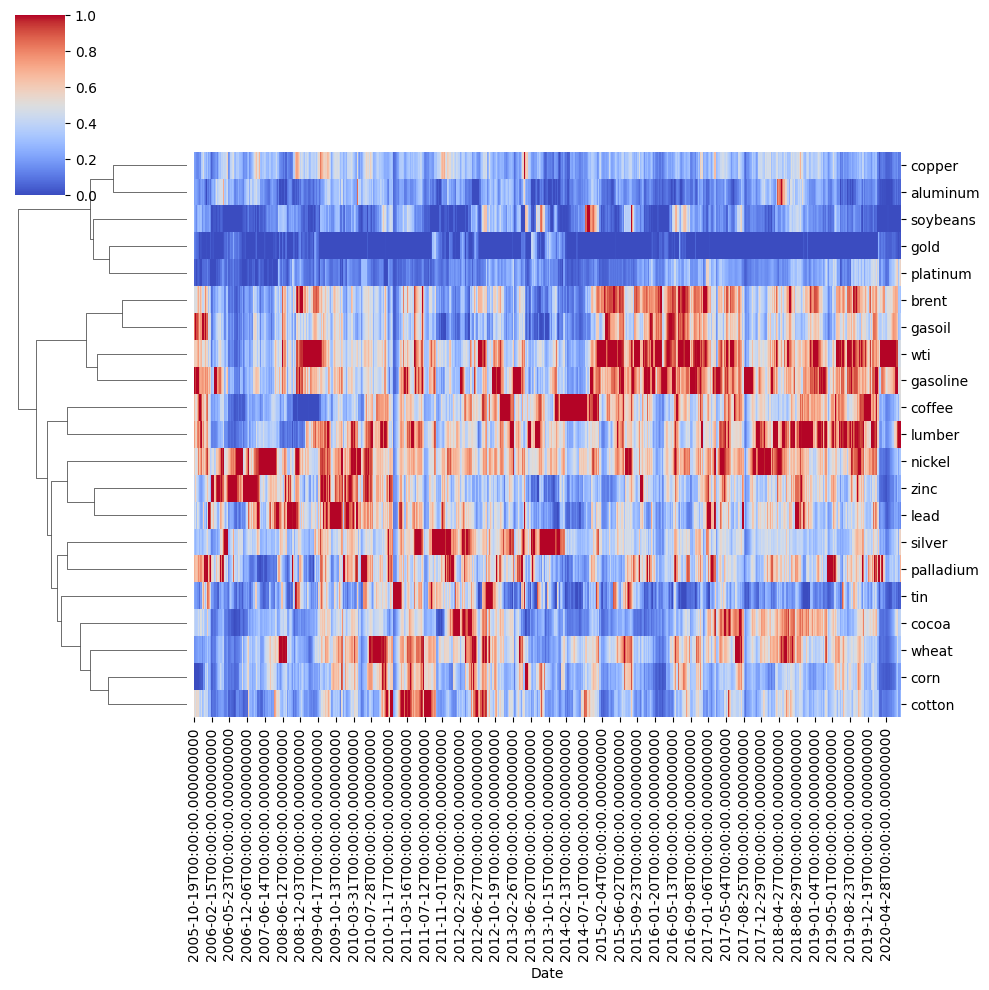

In [ ]:
cg = sns.clustermap(volatility_data.transpose(), standard_scale=1, col_cluster=False, cmap='coolwarm')